In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import gzip
import json
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df2 = getDF('/content/drive/MyDrive/reviews_Musical_Instruments_5.json.gz')
df2

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [22]:
list_of_reviewer_id = list(df2['reviewerID'])
list_of_rating = list(df2['overall'])
list_of_product_id = list(df2['asin'])
list_of_reviewTime = list(df2['reviewTime'])
print(len(list_of_reviewer_id))

10261


In [23]:
new_list_of_review_year = []
for x in list_of_reviewTime:
  list1 = x.split()
  new_list_of_review_year.append(list1[-1])
print(len(new_list_of_review_year))

10261


In [24]:
def merge(list1, list2):
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
    return merged_list
tuple_t2 = merge(list_of_reviewer_id, new_list_of_review_year)
tuple_t3 = merge(list_of_product_id,new_list_of_review_year)
tuple_t4 = merge(list_of_rating,new_list_of_review_year)
list_of_tuple = list(tuple_t2)
list_of_tuple1 = list(tuple_t3)
list_of_tuple2 = list(tuple_t4)
sorted_list = sorted(list_of_tuple,key=lambda t: t[1])
sorted_list1 = sorted(list_of_tuple1,key=lambda t: t[1])
sorted_list2 = sorted(list_of_tuple2,key=lambda t: t[1])

In [25]:
print(len(sorted_list))

10261


In [26]:
print(len(sorted_list1))

10261


In [27]:
print(len(sorted_list2))

10261


In [28]:
list_of_reviewer_id_group1 = []
list_of_reviewer_id_group2 = []
list_of_rating_group1 = []
list_of_rating_group2 = []
list_of_product_id_group1 = []
list_of_product_id_group2 = []

In [29]:
for x in sorted_list:
  if int(x[1]) >=2004 and int(x[1]) <=2012:
     list_of_reviewer_id_group1.append(x[0])
  elif int(x[1]) >2012:
    list_of_reviewer_id_group2.append(x[0])

In [30]:
for x in sorted_list1:
  if int(x[1]) >=2004 and int(x[1]) <=2012:
    list_of_product_id_group1.append(x[0])
  elif int(x[1]) >2012:
    list_of_product_id_group2.append(x[0])

In [31]:
for x in sorted_list2:
  if int(x[1]) >=2004 and int(x[1]) <=2012:
    list_of_rating_group1.append(x[0])
  elif int(x[1]) >2012:
    list_of_rating_group2.append(x[0])

In [32]:
print(len(list_of_reviewer_id_group1))
print(len(list_of_product_id_group1))
print(len(list_of_rating_group1))

print(len(list_of_reviewer_id_group2))
print(len(list_of_product_id_group2))
print(len(list_of_rating_group2))

3527
3527
3527
6734
6734
6734


In [33]:
# graph of group 1 for p-p with edges = same rating
tuple_new_1 = merge(list_of_product_id_group1,list_of_rating_group1)
new_list_of_tuple1 = list(tuple_new_1)
new_list_of_tuple11 = merge(list_of_reviewer_id_group1,tuple_new_1)
print(len(new_list_of_tuple11))

3527


In [34]:
# graph of group 1 r-r with edges product and rating 4 and 5
graph_pos1 = nx.Graph()

12063
True


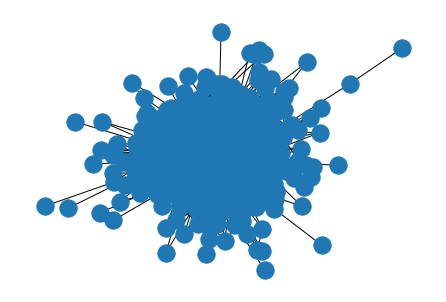

In [35]:
for x in new_list_of_tuple11:
  for y in new_list_of_tuple11:
    if ((int(x[1][1])==4 or int(x[1][1])==5) and (int(y[1][1])==4 or int(y[1][1])==5 ) and (str(x[1][0])==str(y[1][0])) and (str(x[0])!=str(y[0]))):
      graph_pos1.add_edge(x[0],y[0])
print(nx.number_of_edges(graph_pos1))
print(nx.is_connected(graph_pos1))
nx.draw(graph_pos1)

In [36]:
# graph of group 1 r-r with edges  rating 1 and 2 and 3
graph_neg1 = nx.Graph()

32
False


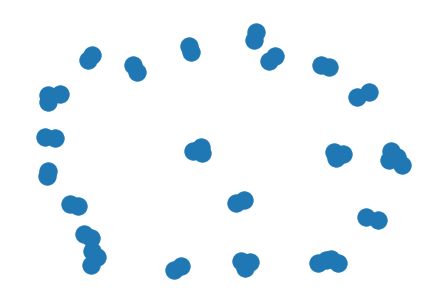

In [37]:
for x in new_list_of_tuple11:
  for y in new_list_of_tuple11:
    if ((int(x[1][1])==1 or int(x[1][1])==2 ) and (int(y[1][1])==1 or int(y[1][1])==2 ) and (str(x[1][0])==str(y[1][0])) and (str(x[0])!=str(y[0]))):
      graph_neg1.add_edge(x[0],y[0])
print(nx.number_of_edges(graph_neg1))
print(nx.is_connected(graph_neg1))
nx.draw(graph_neg1)

In [38]:
# graph of group 1 for r-r with edges =product id
tuple_new_2 = merge(list_of_reviewer_id_group1,list_of_product_id_group1)
new_list_of_tuple2 = list(tuple_new_2)
print(len(new_list_of_tuple2))

3527


In [39]:
# graph of group 1 r-r with edges  product id
graph_product1 = nx.Graph()

14770
True


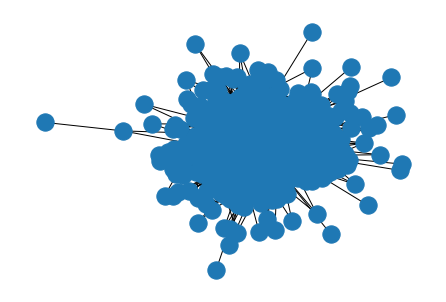

In [40]:
for x in new_list_of_tuple2:
  for y in new_list_of_tuple2:
    if ((str(x[1])==str(y[1])) and (str(x[0])!=str(y[0]))):
      graph_product1.add_edge(x[0],y[0])
print(nx.number_of_edges(graph_product1))
print(nx.is_connected(graph_product1))
nx.draw(graph_product1)

In [41]:
# graph of group 1 p-p with edges  rating
tuple_new_3 = merge(list_of_product_id_group1,list_of_reviewer_id_group1)
new_list_of_tuple3 = list(tuple_new_3)
print(len(new_list_of_tuple3))

3527


In [42]:
# graph of group 1 r-r with edges  product id
graph_porduct_pop1 = nx.Graph()

8920
False


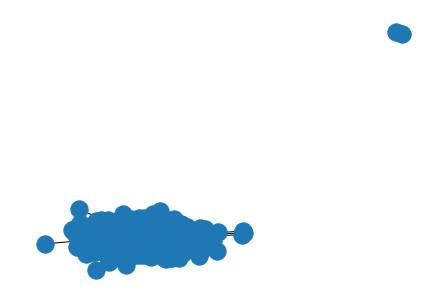

In [43]:
for x in new_list_of_tuple3:
  for y in new_list_of_tuple3:
    if ((str(x[1])==str(y[1])) and (str(x[0])!=str(y[0]))):
      graph_porduct_pop1.add_edge(x[0],y[0])
print(nx.number_of_edges(graph_porduct_pop1))
print(nx.is_connected(graph_porduct_pop1))
nx.draw(graph_porduct_pop1)

In [48]:
# graph of group 2 for p-p with edges = same rating
tuple_new_2 = merge(list_of_product_id_group2,list_of_rating_group2)
new_list_of_tuple2 = list(tuple_new_2)
new_list_of_tuple22 = merge(list_of_reviewer_id_group2,tuple_new_2)
print(len(new_list_of_tuple22))

6734


In [49]:
# graph of group 1 r-r with edges product and rating 4 and 5
graph_pos2 = nx.Graph()

43239
True


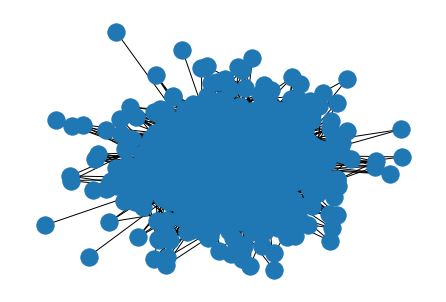

In [50]:
for x in new_list_of_tuple22:
  for y in new_list_of_tuple22:
    if ((int(x[1][1])==4 or int(x[1][1])==5) and (int(y[1][1])==4 or int(y[1][1])==5 ) and (str(x[1][0])==str(y[1][0])) and (str(x[0])!=str(y[0]))):
      graph_pos2.add_edge(x[0],y[0])
print(nx.number_of_edges(graph_pos2))
print(nx.is_connected(graph_pos2))
nx.draw(graph_pos2)

In [73]:
# graph of group 2 r-r with edges  rating 1 and 2 and 3
graph_neg2 = nx.Graph()

40755
True


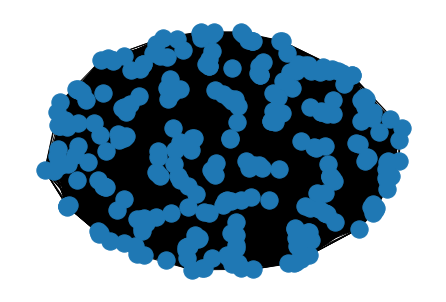

In [74]:
for x in new_list_of_tuple11:
  for y in new_list_of_tuple11:
    if ((int(x[1][1])==1 or int(x[1][1])==2 or int(x[1][1])==3) and (int(y[1][1])==1 or int(y[1][1])==2 or int(y[1][1])==3 ) and (str(x[0])!=str(y[0]))):
      graph_neg2.add_edge(x[0],y[0])
print(nx.number_of_edges(graph_neg2))
print(nx.is_connected(graph_neg2))
nx.draw(graph_neg2)

In [53]:
# graph of group 2 for r-r with edges =product id
tuple_new_23 = merge(list_of_reviewer_id_group2,list_of_product_id_group2)
new_list_of_tuple23 = list(tuple_new_23)
print(len(new_list_of_tuple23))

6734


In [54]:
# graph of group 1 r-r with edges  product id
graph_product2 = nx.Graph()

53379
True


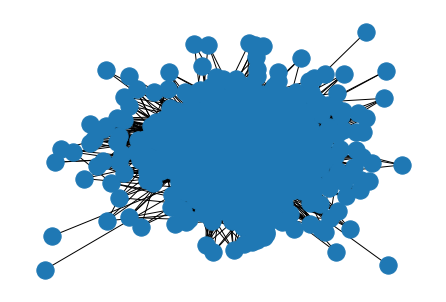

In [55]:
for x in new_list_of_tuple23:
  for y in new_list_of_tuple23:
    if ((str(x[1])==str(y[1])) and (str(x[0])!=str(y[0]))):
      graph_product2.add_edge(x[0],y[0])
print(nx.number_of_edges(graph_product2))
print(nx.is_connected(graph_product2))
nx.draw(graph_product2)

In [56]:
# graph of group 2 p-p with edges  rating
tuple_new_23 = merge(list_of_product_id_group2,list_of_rating_group2)
new_list_of_tuple23 = list(tuple_new_23)
print(len(new_list_of_tuple23))

6734


In [57]:
# graph of group 2 r-r with edges  product id
graph_porduct_pop2 = nx.Graph()

388672
True


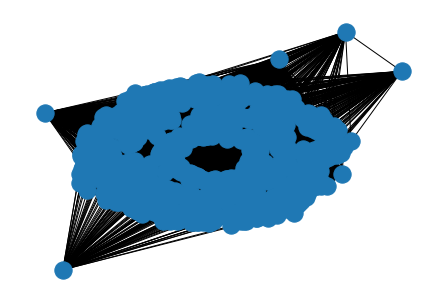

In [58]:
for x in new_list_of_tuple23:
  for y in new_list_of_tuple23:
    if ((str(x[1])==str(y[1])) and (str(x[0])!=str(y[0]))):
      graph_porduct_pop2.add_edge(x[0],y[0])
print(nx.number_of_edges(graph_porduct_pop2))
print(nx.is_connected(graph_porduct_pop2))
nx.draw(graph_porduct_pop2)

In [59]:
from community import community_louvain
import numpy as np

In [65]:
def comm_color(graph_name,comms):
  cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green',
    5 : 'yellow',
    6 : 'blue',
    7 : 'red',
    8 : 'purple',
    9 : 'grey',
    10: 'white'

}
  node_cmap = [cmap[v] for _,v in comms.items()]
  pos = nx.spring_layout(graph_name)
  nx.draw(graph_name, pos, node_size = 75, alpha = 0.8, node_color=node_cmap)
  plt.show()

In [61]:
def comm_part(graph_name):
  comms = community_louvain.best_partition(graph_name)
  unique_coms = np.unique(list(comms.values()))
  return comms

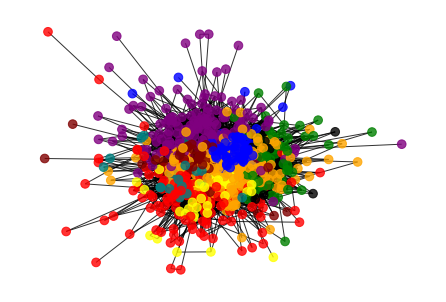

In [62]:
# graph of group 1
comm11 = comm_part(graph_pos1)
comm_color(graph_pos1,comm11)

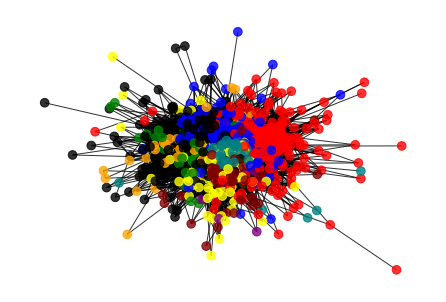

In [63]:
# graph of group 1
comm12 = comm_part(graph_product1)
comm_color(graph_product1,comm12)

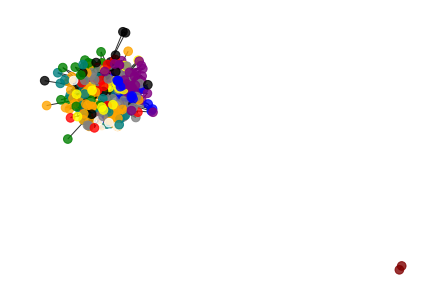

In [66]:
# graph of group 1
comm13 = comm_part(graph_porduct_pop1)
comm_color(graph_porduct_pop1,comm13)

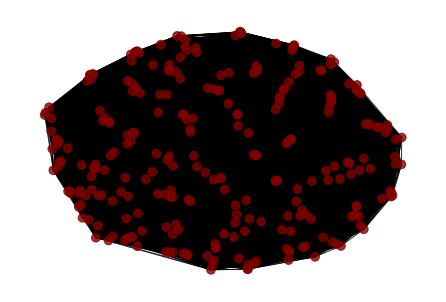

In [67]:
# graph of group 1
comm14 = comm_part(graph_neg1)
comm_color(graph_neg1,comm14)

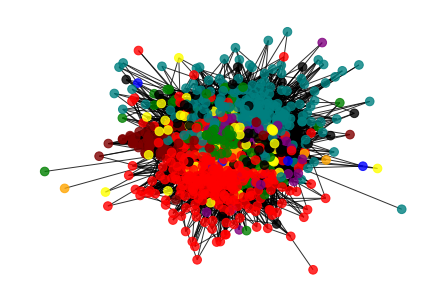

In [68]:
# graph of group 2
comm21 = comm_part(graph_pos2)
comm_color(graph_pos2,comm21)

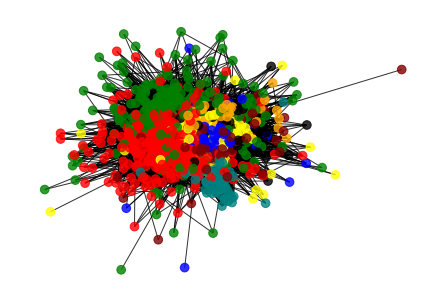

In [69]:
# graph of group 2
comm22 = comm_part(graph_product2)
comm_color(graph_product2,comm22)

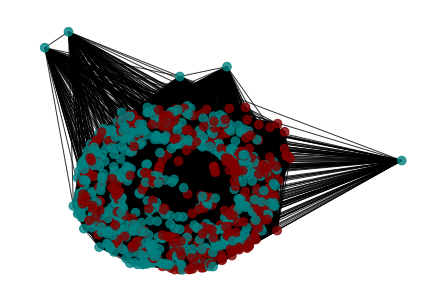

In [70]:
# graph of group 2
comm23 = comm_part(graph_porduct_pop2)
comm_color(graph_porduct_pop2,comm23)

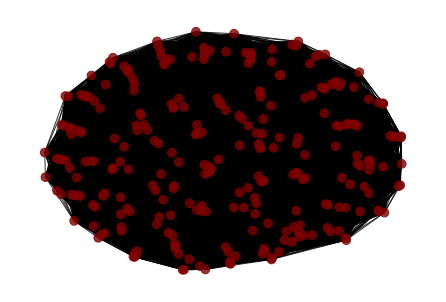

In [75]:
# graph of group 2
comm24 = comm_part(graph_neg2)
comm_color(graph_neg2,comm24)